<a href="https://colab.research.google.com/github/pk38/DimensionalBiasDetection/blob/dev_div/EDA_part2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd 
import numpy as np 
import random
import matplotlib.pyplot as plt 
from google.colab import drive
import collections

from wordcloud import WordCloud, STOPWORDS 

In [2]:
drive.mount('/content/drive/')


Mounted at /content/drive/


In [3]:
%cd /content/drive/Shared drives/CSE293ResearchProject/ml-latest-small


/content/drive/Shared drives/CSE293ResearchProject/ml-latest-small


In [4]:
#number of unique movies
movie_data= pd.read_csv('movies.csv')
movie_data.shape
movies = movie_data['movieId'].unique().tolist()
len(movies)
movie_data


,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,193585,Flint (2017),Drama
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation


In [5]:
#summary of ratings.csv

ratings_data=pd.read_csv('ratings.csv',sep=',')
ratings_data.shape
ratings_data.describe()



,userId,movieId,rating,timestamp
count,100836.000000,100836.000000,100836.000000,1.008360e+05
mean,326.127564,19435.295718,3.501557,1.205946e+09
std,182.618491,35530.987199,1.042529,2.162610e+08
min,1.000000,1.000000,0.500000,8.281246e+08
25%,177.000000,1199.000000,3.000000,1.019124e+09
50%,325.000000,2991.000000,3.500000,1.186087e+09
75%,477.000000,8122.000000,4.000000,1.435994e+09
max,610.000000,193609.000000,5.000000,1.537799e+09


In [6]:
#minimum rating given to a movie
ratings_data['rating'].min() 

0.5

In [7]:
#maximum rating given to a movie
ratings_data['rating'].max()

5.0

In [8]:
#Checking for null values
# checking movies.csv
movie_data.shape

(9742, 3)

In [11]:
#is any row null
movie_data.isnull().any()

movieId    False
title      False
genres     False
dtype: bool

In [12]:
#checking ratings.csv
ratings_data.shape

(100836, 4)

In [13]:
#is any row null there
ratings_data.isnull().any()


userId       False
movieId      False
rating       False
timestamp    False
dtype: bool

In [14]:
#checking tags.csv
tags_data=pd.read_csv('tags.csv',sep=',')
tags_data.shape

(3683, 4)

In [15]:
#is any row null in tags.csv
tags_data.isnull().any()

userId       False
movieId      False
tag          False
timestamp    False
dtype: bool

In [16]:
# number of unique tags 
unique_tags=tags_data['tag'].unique().tolist()
len(unique_tags)

1589

In [18]:
# counts the number of times each genre appear:
def count_word(df, ref_col, liste):
    keyword_count = dict()
    for s in liste: keyword_count[s] = 0
    for liste_keywords in df[ref_col].str.split('|'):
        if type(liste_keywords) == float and pd.isnull(liste_keywords): continue
        for s in liste_keywords: 
            if pd.notnull(s): keyword_count[s] += 1
    # convert the dictionary in a list to sort the keywords  by frequency
    keyword_occurences = []
    for k,v in keyword_count.items():
        keyword_occurences.append([k,v])
    keyword_occurences.sort(key = lambda x:x[1], reverse = True)
    return keyword_occurences, keyword_count

In [19]:
genre_labels = set()
for s in movie_data['genres'].str.split('|').values:
    genre_labels = genre_labels.union(set(s))
#counting how many times each of genres occur:
keyword_occurences, dum = count_word(movie_data, 'genres', genre_labels)
keyword_occurences

[['Drama', 4361],
 ['Comedy', 3756],
 ['Thriller', 1894],
 ['Action', 1828],
 ['Romance', 1596],
 ['Adventure', 1263],
 ['Crime', 1199],
 ['Sci-Fi', 980],
 ['Horror', 978],
 ['Fantasy', 779],
 ['Children', 664],
 ['Animation', 611],
 ['Mystery', 573],
 ['Documentary', 440],
 ['War', 382],
 ['Musical', 334],
 ['Western', 167],
 ['IMAX', 158],
 ['Film-Noir', 87],
 ['(no genres listed)', 34]]

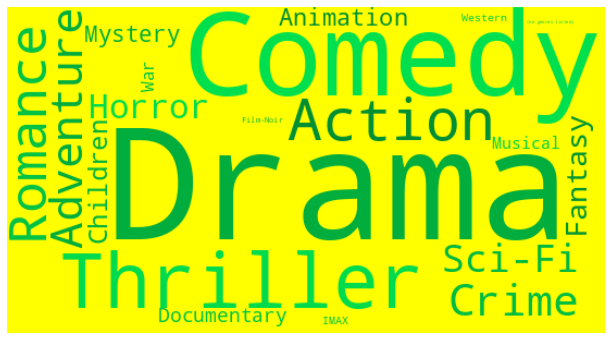

In [24]:
# control the color of the words
def random_color_func(word=None, font_size=None, position=None,
                      orientation=None, font_path=None, random_state=None):
    h = int(360.0 * tone / 255.0)
    s = int(100.0 * 255.0 / 255.0)
    l = int(100.0 * float(random_state.randint(70, 120)) / 255.0)
    return "hsl({}, {}%, {}%)".format(h, s, l)


# the result is shown as a wordcloud:
words = dict()
trunc_occurences = keyword_occurences[0:50]
for s in trunc_occurences:
    words[s[0]] = s[1]
tone = 100 # define the color of the words
f, ax = plt.subplots(figsize=(14, 6))
wordcloud = WordCloud(width=550,height=300, background_color='yellow', 
                      max_words=1628,relative_scaling=0.7,
                      color_func = random_color_func,
                      normalize_plurals=False)
wordcloud.generate_from_frequencies(words)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

[['Drama', 4361], ['Comedy', 3756], ['Thriller', 1894], ['Action', 1828], ['Romance', 1596], ['Adventure', 1263], ['Crime', 1199], ['Sci-Fi', 980], ['Horror', 978], ['Fantasy', 779], ['Children', 664], ['Animation', 611], ['Mystery', 573], ['Documentary', 440], ['War', 382], ['Musical', 334], ['Western', 167], ['IMAX', 158], ['Film-Noir', 87], ['(no genres listed)', 34]]


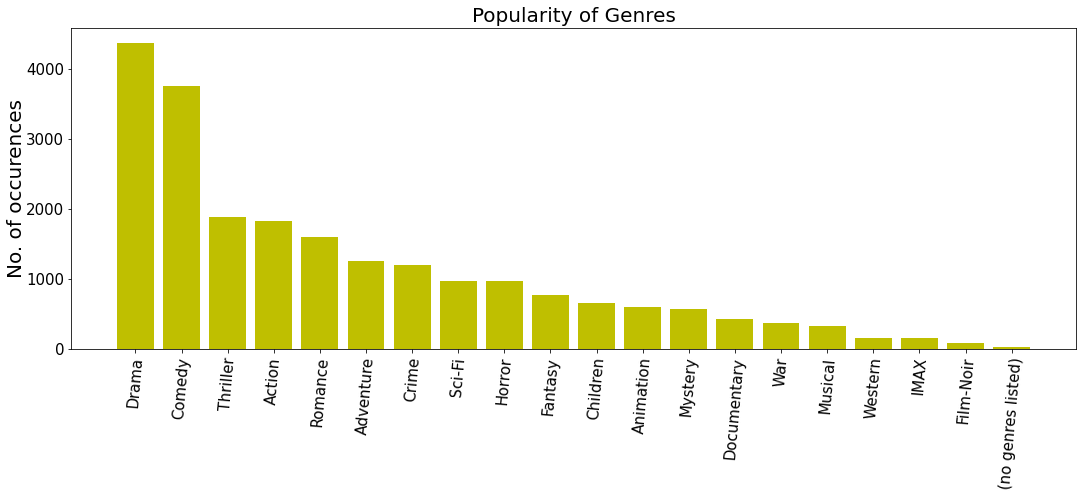

In [38]:
# same result in the histogram
fig = plt.figure(1, figsize=(18,13))
ax2 = fig.add_subplot(2,1,2)
print(trunc_occurences)
y_axis = [i[1] for i in trunc_occurences]
x_axis = [k for k,i in enumerate(trunc_occurences)]
x_label = [i[0] for i in trunc_occurences]
plt.xticks(rotation=85, fontsize = 15)
plt.yticks(fontsize = 15)
plt.xticks(x_axis, x_label)
plt.ylabel("No. of occurences", fontsize = 20, labelpad = 0)
ax2.bar(x_axis, y_axis, align = 'center', color='y')
plt.title("Popularity of Genres",fontsize = 20)
plt.show()

In [ ]:
genres = ['Action','Adventure','Animation','Children','Comedy','Crime','Documentary','Drama','Fantasy','Film-Noir','Horror','Musical','Mystery','Romance','Sci-Fi','Thriller','War','Western']
genres_rating_list = []


In [ ]:
# merge ratings and movies


#merge ratings_data and movie_data
all_data = ratings_data.merge(movie_data)
all_data

,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,5,1,4.0,847434962,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,7,1,4.5,1106635946,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
3,15,1,2.5,1510577970,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
4,17,1,4.5,1305696483,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
...,...,...,...,...,...,...
100831,610,160341,2.5,1479545749,Bloodmoon (1997),Action|Thriller
100832,610,160527,4.5,1479544998,Sympathy for the Underdog (1971),Action|Crime|Drama
100833,610,160836,3.0,1493844794,Hazard (2005),Action|Drama|Thriller
100834,610,163937,3.5,1493848789,Blair Witch (2016),Horror|Thriller


In [ ]:
genre_labels = set()
for s in all_data['genres'].str.split('|').values:
    genre_labels = genre_labels.union(set(s))
#counting how many times each of genres occur:
keyword_occurences, dum = count_word(all_data, 'genres', genre_labels)
keyword_occurences

[['Drama', 41928],
 ['Comedy', 39053],
 ['Action', 30635],
 ['Thriller', 26452],
 ['Adventure', 24161],
 ['Romance', 18124],
 ['Sci-Fi', 17243],
 ['Crime', 16681],
 ['Fantasy', 11834],
 ['Children', 9208],
 ['Mystery', 7674],
 ['Horror', 7291],
 ['Animation', 6988],
 ['War', 4859],
 ['IMAX', 4145],
 ['Musical', 4138],
 ['Western', 1930],
 ['Documentary', 1219],
 ['Film-Noir', 870],
 ['(no genres listed)', 47]]

In [ ]:
def getGenreRatingDictionaryForUser(userId):
  # get all genre values for one user
  user_data = all_data[all_data['userId'] == userId]
  # separate genres of this user
  genreRatingPerUser = collections.defaultdict(list)
  for idx in user_data.index:
    genre_list = (user_data['genres'][idx]).split('|')
    for genre in genre_list:
      7[8ugenre].append(user_data['rating'][idx])
  return genreRatingPerUser


# find average rating for each genre and append the rating and the count of ratings for each genre
def getAverageRatingPerGenre(genreRating):
  df = pd.DataFrame()
  Genre = []
  averageRatingPerGenre = []
  genreRatingLength = []
  for genre in genreRating:
    Genre.append(genre)
    averageRatingPerGenre.append(sum(genreRating[genre])/len(genreRating[genre]))
    genreRatingLength.append(len(genreRating[genre]))
  df['Genre'] = Genre
  df["Average Ratings"] = averageRatingPerGenre  
  df["Rating count per Genre"] = genreRatingLength  
  return df

In [ ]:
genreRatingForUser1 = getGenreRatingDictionaryForUser(1)
print(genreRatingForUser1)

avgGenreRatingForUser1 = getAverageRatingPerGenre(genreRatingForUser1)
print(avgGenreRatingForUser1)

defaultdict(<class 'list'>, {'Adventure': [4.0, 5.0, 5.0, 5.0, 3.0, 5.0, 4.0, 4.0, 4.0, 3.0, 5.0, 3.0, 4.0, 3.0, 3.0, 5.0, 5.0, 3.0, 3.0, 5.0, 5.0, 5.0, 4.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 4.0, 5.0, 4.0, 5.0, 4.0, 5.0, 4.0, 4.0, 5.0, 3.0, 5.0, 4.0, 4.0, 5.0, 5.0, 5.0, 5.0, 4.0, 5.0, 4.0, 4.0, 4.0, 3.0, 4.0, 5.0, 3.0, 2.0, 4.0, 4.0, 5.0, 4.0, 5.0, 5.0, 4.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 4.0, 4.0, 4.0, 4.0, 5.0, 4.0, 5.0, 5.0, 4.0, 5.0, 4.0], 'Animation': [4.0, 5.0, 5.0, 3.0, 5.0, 5.0, 5.0, 5.0, 3.0, 5.0, 5.0, 4.0, 5.0, 5.0, 5.0, 5.0, 5.0, 4.0, 4.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 4.0], 'Children': [4.0, 5.0, 5.0, 5.0, 3.0, 5.0, 3.0, 5.0, 5.0, 5.0, 5.0, 3.0, 5.0, 5.0, 5.0, 5.0, 5.0, 4.0, 5.0, 5.0, 5.0, 4.0, 5.0, 4.0, 5.0, 5.0, 3.0, 4.0, 4.0, 5.0, 5.0, 5.0, 5.0, 5.0, 3.0, 5.0, 5.0, 5.0, 5.0, 4.0, 4.0, 4.0], 'Comedy': [4.0, 4.0, 3.0, 5.0, 5.0, 5.0, 3.0, 5.0, 4.0, 3.0, 5.0, 4.0, 4.0, 4.0, 3.0, 4.0, 4.0, 5.0, 3.0, 4.0, 4.0, 4.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5